## N-Grams

**N-grams** are one of the fundamental concepts every data scientist and computer science professional must know while working with text data. N-grams are continuous sequences of words or symbols, or tokens in a document. In technical terms, they can be defined as the neighboring sequences of items in a document. They come into play when we deal with text data in NLP (Natural Language Processing) tasks. They have a wide range of applications, like language models, semantic features, spelling correction, machine translation, text mining, etc.

### How Are N-Grams Classified?

Generally, we used to store such values in a variable declared as ‘n’! Apart from programming, you must have extensively encountered ‘n’ in the formulae of the sum of series and so on. Summing up, ‘n’ is just a variable that can have positive integer values, including 1,2,3, and so on.’n’ basically refers to multiple.
Thinking along the same lines, n-grams are classified into the following types, depending on the value that ‘n’ takes.

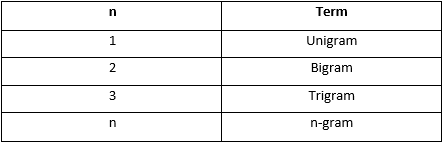

### Why do we need many different types of N-Grams?
As clearly depicted in the table above, when n=1, it is said to be a unigram. When n=2, it is said to be a bigram, and so on. This is because different types of n-grams are suitable for different types of applications. You should try different n-grams on your data in order to confidently conclude which one works the best among all for your text analysis. For instance, research has substantiated that trigrams and 4 grams work the best in the case of spam filtering. 

### Example of N-Grams
Let’s understand n-grams practically with the help of the following sample sentence:
“I reside in Fort Wayne”

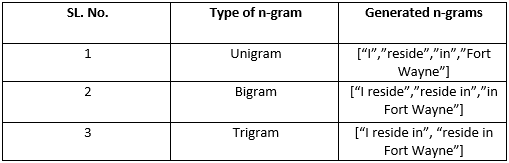


In [24]:
import nltk
from nltk import *
sentence = 'I reside in Fort Wayne.'
n = 1
unigrams = ngrams(sentence.split(), n)
for grams in unigrams:
    print(grams)

('I',)
('reside',)
('in',)
('Fort',)
('Wayne.',)


From the table above, it is clear that unigram means taking only one word at a time, bigram means taking two words at a time, and trigram means taking three words at a time. 

### Step-By-Step Implementation of N-Grams in Python


#### Step 1: Explore the Dataset
We will be using sentiment analysis for the financial news dataset. The sentiments are from the perspective of retail investors. It is an open-source Kaggle dataset.

In [31]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')

df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1")
df.columns =['Sentiment', 'News Headline']
print(df.head())

  Sentiment                                      News Headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4845 non-null   object
 1   News Headline  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


We can see that the dataset has 4846 rows and two columns, namely,’ Sentiment’ and ‘News Headline.’

In [33]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

The data is perfect with absolutely no missing values!

In [34]:
df['Sentiment'].value_counts()

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

We can undoubtedly infer that the dataset includes three categories of sentiments:<br>
**1. Neutral**<br>
**2. Positive**<br>
**3. Negative**<br>
Out of 4846 sentiments, 2878 have been found to be neutral, 1363 positive, and the rest negative.

#### Step 2: Feature Extraction
Our objective is to predict the sentiment of a given news headline. Obviously, the ‘News Headline’ column is our only feature, and the ‘Sentiment’ column is our target variable.

In [35]:
y=df['Sentiment'].values
y.shape
x=df['News Headline'].values
x.shape

(4845,)

Both the outputs return a shape of (4845,) which means 4846 rows and 1 column as we have 4845 rows of data and just 1 feature and a target for x and y, respectively.

#### Step 3: Train-Test Split
In any machine learning, deep learning, or NLP(Natural Language Processing) task, splitting the data into train and test is indeed a highly crucial step. The train_test_split() method provided by sklearn is widely used for the same. So, let’s begin by importing it:

In [36]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

Our next step is to convert these NumPy arrays to Pandas data frames and thus create two data frames, namely,df_train and df_test. The former is created by concatenating x_train and y_train arrays. The latter data frame is created by concatenating x_test and y_test arrays. 

In [37]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)
df_train.head()

,news,sentiment
0,"After the split , the number of K shares will ...",neutral
1,The Engines in Asia-Pacific industry profile i...,neutral
2,Through its partnership with Finnish Paulig 's...,neutral
3,Name of Company in which holdings have been ac...,neutral
4,Finnish real estate company Sponda Oyj said on...,neutral


In [38]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,news,sentiment
0,Asimilar agreement was signed between China Mo...,neutral
1,Koff 's market share of the volume of the mark...,neutral
2,Following the increase the company+EUR TM s c...,neutral
3,`` We cut our frequency to New York last year ...,neutral
4,"The launch of the plant in June went well , an...",neutral
